In [1]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

In [3]:
import os
os.getcwd()

'C:\\Users\\Sumanth_Kavety\\Downloads'

In [5]:
#reading Dataset
retail = pd.read_csv("Online+Retail.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

# parse date
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [6]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
#dropping the na cells
order_wise = retail.dropna()

In [9]:
#Sanity check
order_wise.shape
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
order_wise["Amount"] = order_wise["Quantity"] * order_wise['UnitPrice']

C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_8440\183422998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_wise["Amount"] = order_wise["Quantity"] * order_wise['UnitPrice']


In [11]:
order_wise

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [19]:
monetary = order_wise.groupby("CustomerID").agg({"Amount":"sum"})
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [23]:
#Frequency function
frequency = order_wise[['CustomerID', 'InvoiceNo']]
frequency

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536365
2,17850.0,536365
3,17850.0,536365
4,17850.0,536365
...,...,...
406824,12680.0,581587
406825,12680.0,581587
406826,12680.0,581587
406827,12680.0,581587


In [27]:
k = frequency.groupby("CustomerID").agg({"InvoiceNo":"count"})
k=k.reset_index()
k

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [45]:
k2 = k.rename(columns ={"InvoiceNo":"Frequency"})
k2.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [33]:
order_wise.loc[order_wise["CustomerID"]==12349.0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
366367,485502,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,12349.0,Italy,15.00
366368,485503,577609,23460,SWEETHEART WALL TIDY,2,2011-11-21 09:51:00,9.95,12349.0,Italy,19.90
366369,485504,577609,21564,PINK HEART SHAPE LOVE BUCKET,6,2011-11-21 09:51:00,2.95,12349.0,Italy,17.70
366370,485505,577609,21411,GINGHAM HEART DOORSTOP RED,3,2011-11-21 09:51:00,4.25,12349.0,Italy,12.75
366371,485506,577609,21563,RED HEART SHAPE LOVE BUCKET,6,2011-11-21 09:51:00,2.95,12349.0,Italy,17.70
...,...,...,...,...,...,...,...,...,...,...
366435,485570,577609,22064,PINK DOUGHNUT TRINKET POT,12,2011-11-21 09:51:00,1.65,12349.0,Italy,19.80
366436,485571,577609,37448,CERAMIC CAKE DESIGN SPOTTED MUG,12,2011-11-21 09:51:00,1.49,12349.0,Italy,17.88
366437,485572,577609,37500,TEA TIME TEAPOT IN GIFT BOX,12,2011-11-21 09:51:00,4.95,12349.0,Italy,59.40
366438,485573,577609,48185,DOORMAT FAIRY CAKE,4,2011-11-21 09:51:00,8.25,12349.0,Italy,33.00


In [47]:
#Merging Frequency and Monetary data sets
master = monetary.merge(k2, on = ["CustomerID"], how = "inner")
master

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [50]:
recency  = order_wise[['CustomerID','InvoiceDate']]
recency.head()

,CustomerID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00


In [51]:
#Generating recency function

# Filtering data for customerid and invoice_date
recency  = order_wise[['CustomerID','InvoiceDate']]

# Finding max data
maximum = max(recency.InvoiceDate)

# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency.InvoiceDate
recency.head()

C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_8440\4105190158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency['diff'] = maximum - recency.InvoiceDate


,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [52]:
# recency by customerid
a = recency.groupby('CustomerID')

In [53]:
a.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00
...,...,...,...
406688,12713.0,2011-12-09 12:16:00,1 days 00:34:00
406689,12713.0,2011-12-09 12:16:00,1 days 00:34:00
406690,12713.0,2011-12-09 12:16:00,1 days 00:34:00
406691,12713.0,2011-12-09 12:16:00,1 days 00:34:00


In [54]:
a["diff"].min()

CustomerID
12346.0   326 days 02:33:00
12347.0     2 days 20:58:00
12348.0    75 days 23:37:00
12349.0    19 days 02:59:00
12350.0   310 days 20:49:00
                 ...       
18280.0   278 days 02:58:00
18281.0   181 days 01:57:00
18282.0     8 days 01:07:00
18283.0     4 days 00:48:00
18287.0    43 days 03:21:00
Name: diff, Length: 4372, dtype: timedelta64[ns]

In [56]:
#DataFrame merging by recency
df=recency.groupby("CustomerID").agg({"diff":"min"})
df=df.reset_index()
df

,CustomerID,diff
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00
...,...,...
4367,18280.0,278 days 02:58:00
4368,18281.0,181 days 01:57:00
4369,18282.0,8 days 01:07:00
4370,18283.0,4 days 00:48:00


In [58]:
dp=df.rename(columns = {"diff":"Recency"})
dp

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00
...,...,...
4367,18280.0,278 days 02:58:00
4368,18281.0,181 days 01:57:00
4369,18282.0,8 days 01:07:00
4370,18283.0,4 days 00:48:00


In [61]:
#Merging frequency, Recency and Monetary into one dataset
RFM = master.merge(dp,on=["CustomerID"], how ="inner")
RFM

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4367,18280.0,180.60,10,278 days 02:58:00
4368,18281.0,80.82,7,181 days 01:57:00
4369,18282.0,176.60,13,8 days 01:07:00
4370,18283.0,2094.88,756,4 days 00:48:00


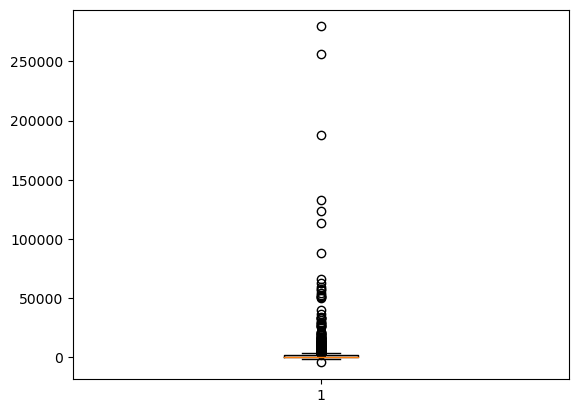

In [62]:
# outlier treatment for Amount
plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

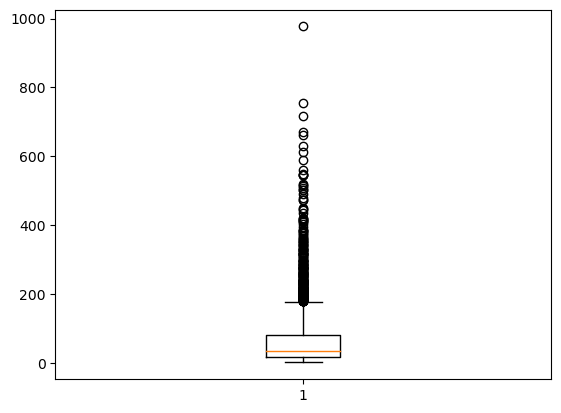

In [63]:
# outlier treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

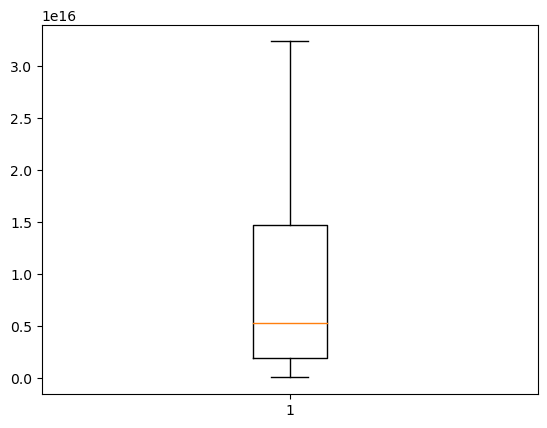

In [64]:
# outlier treatment for Recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [65]:
RFM.head(15)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
5,12352.0,1545.41,95,36 days 22:13:00
6,12353.0,89.00,4,204 days 19:03:00
7,12354.0,1079.40,58,232 days 23:39:00
8,12355.0,459.40,13,214 days 23:01:00
9,12356.0,2811.43,59,23 days 04:10:00
11,12358.0,1168.06,19,2 days 02:24:00


In [66]:
# standardise all parameters
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [67]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


## KMeans with some K:

In [68]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(RFM_norm1)

C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [69]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

In [70]:
sse_

[[2, 0.42929467976639346],
 [3, 0.43933529055238923],
 [4, 0.40871917435637983],
 [5, 0.38828922948076383],
 [6, 0.35672637883500424],
 [7, 0.3330966870656256],
 [8, 0.3411560444456715],
 [9, 0.34850929222640153],
 [10, 0.3532395785050429],
 [11, 0.32043194675829717],
 [12, 0.30386951084298347],
 [13, 0.2945184756038654],
 [14, 0.3083193364668647]]

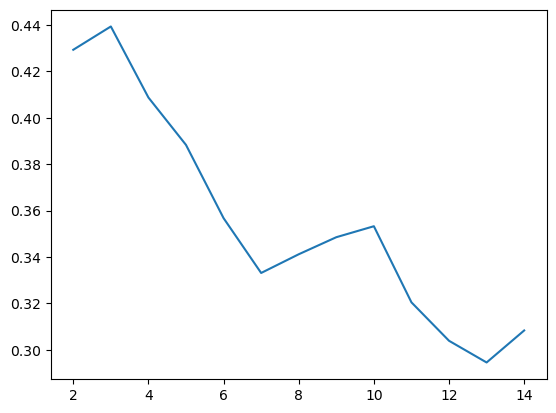

In [71]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [73]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [74]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,117.512195,2471.136724,38.284553
1,1,23.224012,355.383596,57.892387
2,2,20.598234,327.627693,262.737307
3,3,53.589855,1193.020581,49.910145
4,4,114.125683,913.691366,54.122951


<Axes: xlabel='ClusterID', ylabel='Amount_mean'>

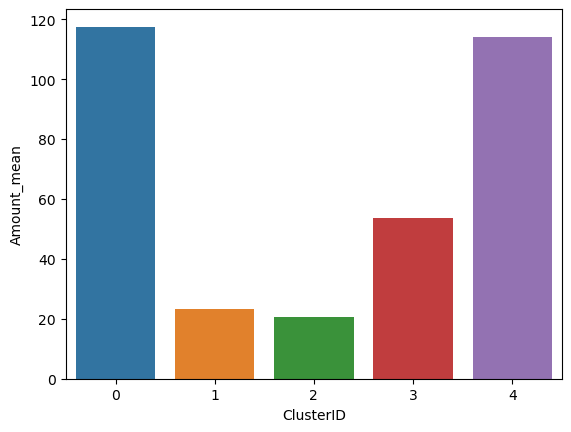

In [75]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)


<Axes: xlabel='ClusterID', ylabel='Frequency_mean'>

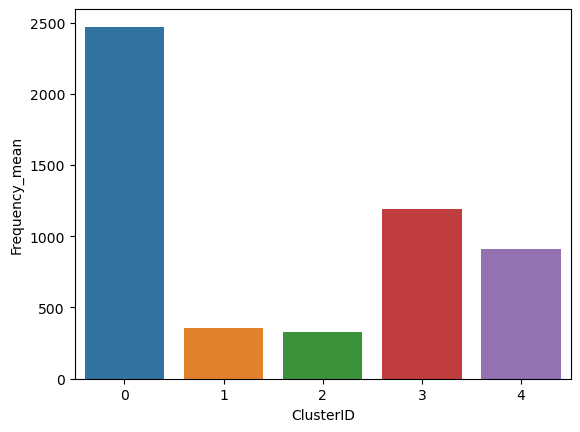

In [76]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

<Axes: xlabel='ClusterID', ylabel='Recency_mean'>

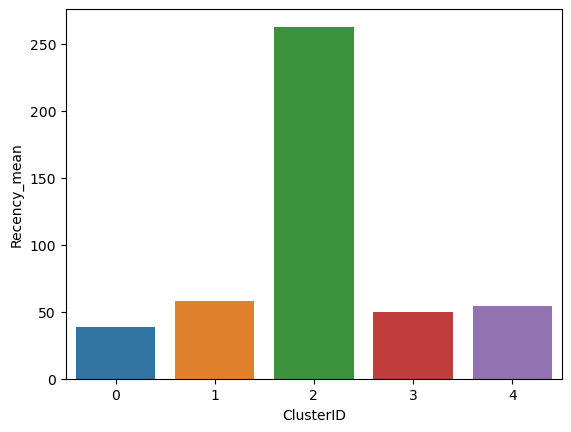

In [77]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)